In [2]:
import numpy as np
from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.metrics import CCMetric
from dipy.viz import regtools
import nibabel as nib

In [3]:
static_nii = nib.load("/home/magic-chusj-2/Desktop/Registration/dchp_atlas_39/template_t1.nii")
static = static_nii.get_fdata()
static_affine = static_nii.affine

In [4]:
mask_atlas_nii = nib.load("/home/magic-chusj-2/Desktop/Registration/dchp_atlas_39/mask.nii")
mask_atlas = mask_atlas_nii.get_fdata().astype(bool)
static[~mask_atlas] = 0

In [23]:
moving_nii = nib.load("/Users/noeedc/Documents/Stage2021/stage_noee2021/registration/results/dipy/HIE_21_mask_affine.nii")
moving = moving_nii.get_fdata()
moving_affine = moving_nii.affine

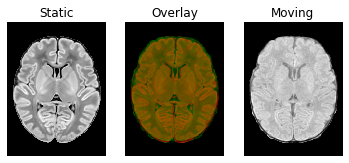

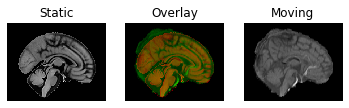

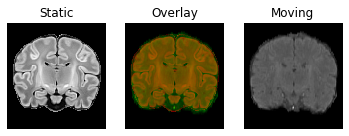

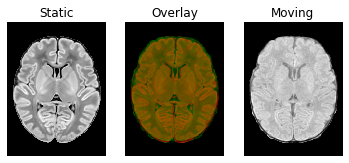

In [24]:
regtools.overlay_slices(static, moving, None, 0,"Static", "Moving")
regtools.overlay_slices(static, moving, None, 1, "Static", "Moving")
regtools.overlay_slices(static, moving, None, 2,"Static", "Moving")

In [25]:
metric = CCMetric(3)
level_iters = [10, 10, 5]
sdr = SymmetricDiffeomorphicRegistration(metric, level_iters)

In [26]:
mapping = sdr.optimize(static, moving, static_affine, moving_affine)

In [27]:
warped_moving = mapping.transform(moving)

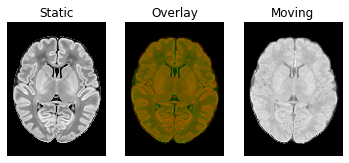

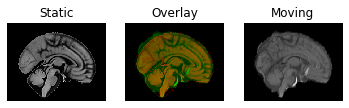

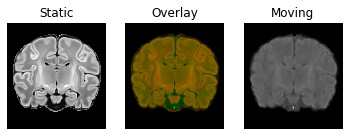

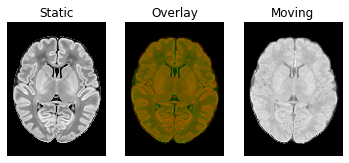

In [28]:
regtools.overlay_slices(static, warped_moving, None, 0,"Static", "Moving")
regtools.overlay_slices(static, warped_moving, None, 1, "Static", "Moving")
regtools.overlay_slices(static, warped_moving, None, 2,"Static", "Moving")

In [31]:
# Save nifti image
img = nib.Nifti1Image(warped_moving, static_nii.affine, header =static_nii.header )
nib.save(img, "/Users/noeedc/Documents/Stage2021/stage_noee2021/registration/results/dipy/HIE_21_mask_warped.nii")  

In [32]:
# Save transformation
with open('/Users/noeedc/Documents/Stage2021/stage_noee2021/registration/results/dipy/diffeomorphic_mask_trans.txt', 'w') as f:
    f.write(str(mapping))